<a href="https://colab.research.google.com/github/jillianhaig/CS3/blob/main/CODE/Case_Study_Replication_Code_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/jillianhaig/CS3 # access data loaded from the github repository

Cloning into 'CS3'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 43 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 8.74 MiB | 3.42 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
# import packages
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [5]:
# load in the dataset
df = pd.read_csv('/content/CS3/DATA/Disney_Movie_Dataset.csv')
df.head()

,username,rating,helpful,total,date,title,review,UniqueID,release_date,recent?
0,havenferrer,10,79,96,2019-02-23,Everyone that rated this below a 7 are why ca...,Oh my god. This has to be the most misundersto...,Inside Out 2015,2015-06-19,0
1,gloriesalbuainain,9,27,31,2019-06-14,I cried like a baby..\n,"I watched the movie long time ago, and I've ju...",Inside Out 2015,2015-06-19,0
2,james-calver,9,396,666,2016-07-09,I feel like everybody has missed the point\n,"I am not normally one to write reviews, but I ...",Inside Out 2015,2015-06-19,0
3,Sweetigal85,10,42,67,2017-05-28,A brilliant depiction of adolescence\n,"As an adult, I love animated films but the tra...",Inside Out 2015,2015-06-19,0
4,acohen090,10,130,234,2018-07-28,How?\n,Wtf people. I was just reading like several on...,Inside Out 2015,2015-06-19,0


In [6]:
# use the VADER package to obtain compounded sentiment scores from the review text data
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [7]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# Function to get sentiment scores
def get_sentiment_scores(review):
    score = analyzer.polarity_scores(review)
    return pd.Series([score['neg'], score['pos'], score['compound']])

In [9]:
# Apply the function to the 'review' column
df[['negative', 'positive', 'compound']] = df['review'].apply(get_sentiment_scores)

In [10]:
df = df.drop(["username"], axis=1)

In [11]:
df.head()

,rating,helpful,total,date,title,review,UniqueID,release_date,recent?,negative,positive,compound
0,10,79,96,2019-02-23,Everyone that rated this below a 7 are why ca...,Oh my god. This has to be the most misundersto...,Inside Out 2015,2015-06-19,0,0.141,0.184,0.9910
1,9,27,31,2019-06-14,I cried like a baby..\n,"I watched the movie long time ago, and I've ju...",Inside Out 2015,2015-06-19,0,0.132,0.187,0.7181
2,9,396,666,2016-07-09,I feel like everybody has missed the point\n,"I am not normally one to write reviews, but I ...",Inside Out 2015,2015-06-19,0,0.069,0.128,0.9703
3,10,42,67,2017-05-28,A brilliant depiction of adolescence\n,"As an adult, I love animated films but the tra...",Inside Out 2015,2015-06-19,0,0.122,0.206,0.9818
4,10,130,234,2018-07-28,How?\n,Wtf people. I was just reading like several on...,Inside Out 2015,2015-06-19,0,0.161,0.087,-0.8791


In [12]:
# Filter for recent reviews
recent_reviews = df[df['recent?'] == 1]

# Calculate the average sentiment score for recent reviews
average_sentiment = recent_reviews['compound'].mean()

print("Average sentiment score for recent reviews:", average_sentiment)

Average sentiment score for recent reviews: 0.8043454630788486


In [13]:
# Filter for recent reviews
not_recent_reviews = df[df['recent?'] == 0]

# Calculate the average sentiment score for recent reviews
average_sentiment2 = not_recent_reviews['compound'].mean()

print("Average sentiment score for not recent reviews:", average_sentiment2)

Average sentiment score for not recent reviews: 0.7791805485445061


In [14]:
# t test
from scipy import stats

recent_scores = df[df['recent?'] == 1]['compound']
non_recent_scores = df[df['recent?'] == 0]['compound']

# Perform a one-tailed t-test
t_statistic, p_value = stats.ttest_ind(recent_scores, non_recent_scores, alternative='greater')

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determines if we reject or fail to reject the null hypothesis
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Recent reviews have higher sentiment scores.")
else:
    print("Fail to reject the null hypothesis: No evidence that recent reviews have higher sentiment scores.")

T-statistic: 3.2990252074238677
P-value: 0.00048619742012325195
Reject the null hypothesis: Recent reviews have higher sentiment scores.


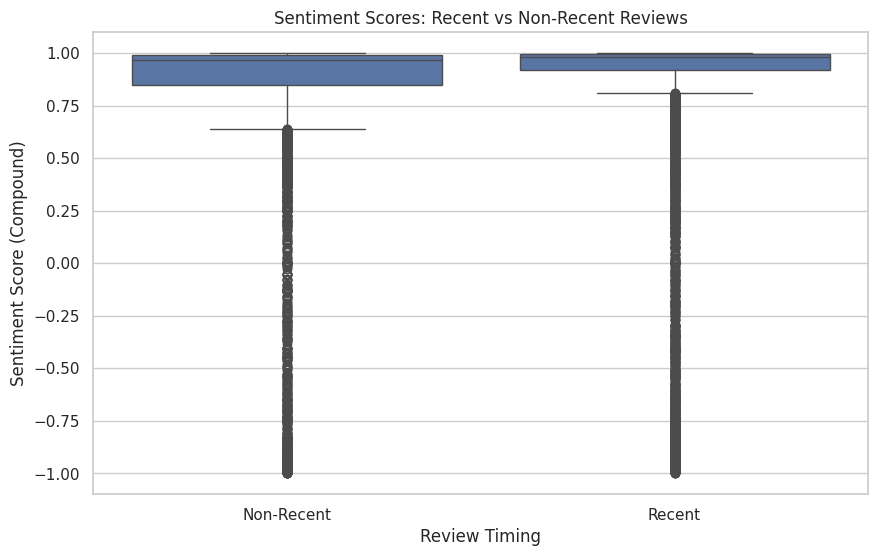

In [15]:
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# changes the background to have a white grid format
sns.set(style="whitegrid")

# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='recent?', y='compound', data=df)
plt.xticks([0, 1], ['Non-Recent', 'Recent'])
plt.title('Sentiment Scores: Recent vs Non-Recent Reviews')
plt.ylabel('Sentiment Score (Compound)')
plt.xlabel('Review Timing')
plt.show()

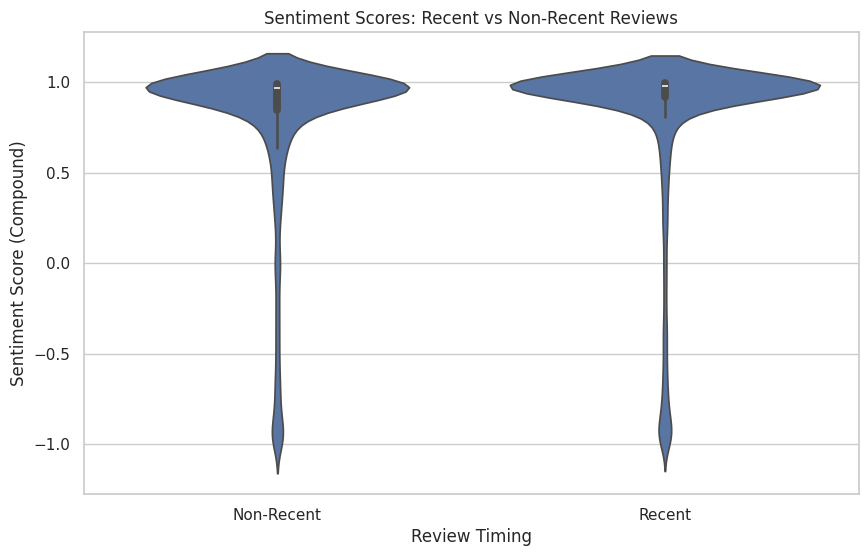

In [16]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='recent?', y='compound', data=df)
plt.xticks([0, 1], ['Non-Recent', 'Recent'])
plt.title('Sentiment Scores: Recent vs Non-Recent Reviews')
plt.ylabel('Sentiment Score (Compound)')
plt.xlabel('Review Timing')
plt.show()

<ipython-input-17-e5b06c41a928>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='recent?', y='compound', data=mean_scores, palette='Blues')


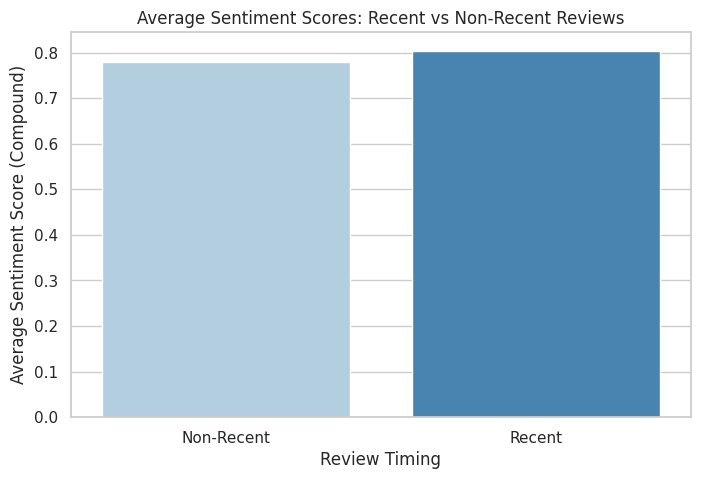

In [17]:
# bar plot for mean sentiment scores
mean_scores = df.groupby('recent?')['compound'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='recent?', y='compound', data=mean_scores, palette='Blues')
plt.xticks([0, 1], ['Non-Recent', 'Recent'])
plt.title('Average Sentiment Scores: Recent vs Non-Recent Reviews')
plt.ylabel('Average Sentiment Score (Compound)')
plt.xlabel('Review Timing')
plt.show()

In [18]:
import statsmodels.api as sm

# Define the independent variable (recent?) and dependent variable (compound)
X = df['recent?']
y = df['compound']

# Add a constant to the independent variable (for the intercept), to capture unmeasured error in y
X = sm.add_constant(X)

# Fits the regression model
model = sm.OLS(y, X).fit()

# R-squared value
r_squared = model.rsquared
print("R-squared:", r_squared)

# Print the summary of the regression
print(model.summary())

R-squared: 0.000700363504788637
                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           0.000972
Time:                        19:17:10   Log-Likelihood:                -10045.
No. Observations:               15531   AIC:                         2.009e+04
Df Residuals:                   15529   BIC:                         2.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.779

In [19]:
# Calculate confidence intervals
recent_mean = df[df['recent?'] == 1]['compound'].mean()
non_recent_mean = df[df['recent?'] == 0]['compound'].mean()

recent_ci = stats.t.interval(0.95, len(df[df['recent?'] == 1])-1, loc=recent_mean, scale=stats.sem(df[df['recent?'] == 1]['compound']))
non_recent_ci = stats.t.interval(0.95, len(df[df['recent?'] == 0])-1, loc=non_recent_mean, scale=stats.sem(df[df['recent?'] == 0]['compound']))

print("Recent CI:", recent_ci)
print("Non-Recent CI:", non_recent_ci)

Recent CI: (0.7950454011362734, 0.8136455250214237)
Non-Recent CI: (0.76753576063952, 0.7908253364494923)


<ipython-input-20-dbef26adfb9b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Mean', data=plot_data, palette='Blues', capsize=.1)


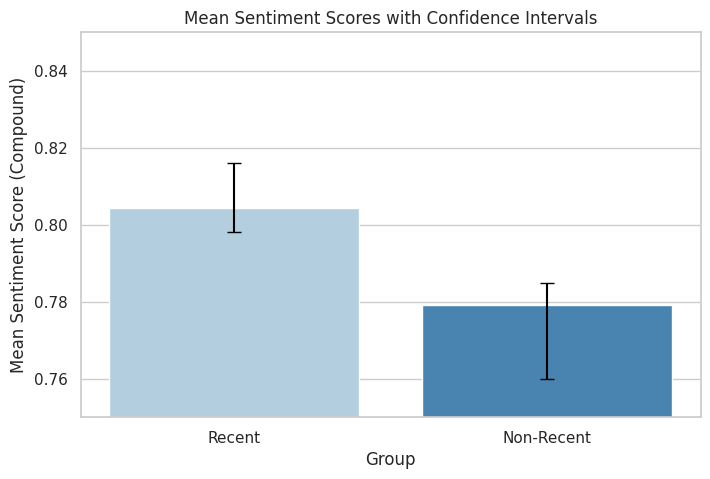

In [20]:
# visualize the confidence interval
import numpy as np

# Calculate means and confidence intervals
mean_recent = df[df['recent?'] == 1]['compound'].mean()
mean_non_recent = df[df['recent?'] == 0]['compound'].mean()
ci_recent = (0.798, 0.816)  # replace with your calculated CIs
ci_non_recent = (0.760, 0.785)

means = [mean_recent, mean_non_recent]
cis = [ci_recent, ci_non_recent]

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Group': ['Recent', 'Non-Recent'],
    'Mean': means,
    'CI_Lower': [ci[0] for ci in cis],
    'CI_Upper': [ci[1] for ci in cis]
})

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Mean', data=plot_data, palette='Blues', capsize=.1)
plt.errorbar(x=plot_data['Group'], y=plot_data['Mean'],
             yerr=[plot_data['Mean'] - plot_data['CI_Lower'],
                    plot_data['CI_Upper'] - plot_data['Mean']],
             fmt='none', c='black', capsize=5)

plt.title('Mean Sentiment Scores with Confidence Intervals')
plt.ylabel('Mean Sentiment Score (Compound)')
plt.ylim(0.75, 0.85)  # Adjust y-axis limits as needed
plt.show()

Since there is no overlap in these intervals we can be sure that the difference is statistically significant
